#Algoritmo Genético

In [ ]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def initialize_population(size, central_point, radius):
    ''''Esta função cria uma população inicial de cromossomos (pontos no espaço 2D)
    distribuídos aleatoriamente em torno de um ponto central dentro de um raio especificado.'''
    x_min = central_point[0] - radius
    x_max = central_point[0] + radius
    y_min = central_point[1] - radius
    y_max = central_point[1] + radius
    population = []
    current_size = 0
    while current_size < size:
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        d = np.sqrt((central_point[0] - x)**2 + (central_point[1] - y)**2)
        if d <= radius:
            population.append((x, y))
            current_size += 1
    return population

def evaluate_population(population, function, mode="min"):
    '''Esta função avalia a população atual calculando os valores de aptidão (fitness)
    para cada cromossomo. O modo "min" indica que estamos minimizando a função,
    portanto, a aptidão é calculada como 1 / (1 + valor da função). Se o modo
    for diferente de "min", a aptidão será simplesmente o valor da função.'''
    fitness_values = []
    if mode == "min":
        # find the fitness value F(x) = 1 / (1 + f(x)) for minimum
        for x, y in population:
            fitness_values.append(1 / (1 + function(x, y)))
    else:
        # find the fitness value F(x) = f(x) for maximum
        for x, y in population:
            fitness_values.append(function(x, y))
    average = sum(fitness_values) / len(population)
    return fitness_values, average

def swap_crossover(chromosome1, chromosome2, mode='1'):
    ''''Esta função realiza a operação de crossover entre dois
     cromossomos permutando suas coordenadas x e y em 1 ou 2 pontos.'''
    x1, y1 = chromosome1
    x2, y2 = chromosome2

    if mode == '1': #apesar do modo 1, esta troca 2 pontos
      new_chromosome1 = (x1, y2)
      new_chromosome2 = (y1, x2)
    else:
      new_chromosome1 = (x1, y2)
      new_chromosome2 = (x2, y1)

    return new_chromosome1, new_chromosome2

def mutate(chromosome, center, radius, mutation_rate):
    '''Esta função realiza a operação de mutação em um cromossomo.
    Ela adiciona um valor aleatório às coordenadas x e y do cromossomo e,
    em seguida, verifica se o cromossomo está dentro do limite do raio
    especificado. Se estiver fora do raio, ele ajusta as coordenadas
    para que o cromossomo fique dentro do limite.'''
    mutated_x = chromosome[0] + random.uniform(-mutation_rate, mutation_rate)
    mutated_y = chromosome[1] + random.uniform(-mutation_rate, mutation_rate)

    distance = np.sqrt((mutated_x - center[0])**2 + (mutated_y - center[1])**2)

    if distance > radius:
        direction = np.arctan2(mutated_y - center[1], mutated_x - center[0])
        mutated_x, mutated_y = center[0] + radius * np.cos(direction), center[1] + radius * np.sin(direction)

    mutated_x = np.clip(mutated_x, center[0] - radius, center[0] + radius)
    mutated_y = np.clip(mutated_y, center[1] - radius, center[1] + radius)

    return (mutated_x, mutated_y)

def elitist_selection(population, fitness_values, elite_percent):
    '''Esta função realiza a seleção de elitismo, mantendo os melhores
    cromossomos (com base nas avaliações de aptidão) e preenchendo o
    restante da próxima geração com cromossomos não elitistas
    selecionados aleatoriamente.'''
    num_elite = int(len(population) * elite_percent)
    sorted_population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]
    elite = sorted_population[:num_elite]
    non_elite = random.sample(sorted_population[num_elite:], len(population) - num_elite)
    next_generation = elite + non_elite
    return next_generation

def plotGraph(population, function, elevation=30, azimuth=-45):
    '''Esta função gera uma visualização 3D dos cromossomos em uma população
    e superpõe a função de otimização em 3D.
    Isso é útil para acompanhar o progresso da otimização.'''
    n = len(population)
    x_array = [None] * n
    y_array = [None] * n
    z_array = [None] * n
    for i in range(n):
        x_array[i] = population[i][0]
        y_array[i] = population[i][1]
        z_array[i] = function(x_array[i], y_array[i])  # Calculate z-coordinate

    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(x_array, y_array, z_array)  # Use z_array as the z-coordinate

    a = b = np.linspace(-5.12, 5.12, num=50)
    X, Y = np.meshgrid(a, b)
    Z = function(X, Y)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="red", linewidth=1)

def sphere(x, y):
    return x**2 + y**2

def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.exp(1) + 20

##Valores padrão GA:

A população de cromossomos representa um ponto (x, y) que está na superficie do corpo geométrico. A superficie seria o ponto Z do espaço 3D.

A primeira imagem está de cabeça para baixo para melhor visualização da população.

As 10 figuras seguintes exibem "de baixo" a "evolução" dos cromossomos.

As ultimas duas figuras mostram em angulos diferentes o minimo local (melhor fitness).

### Esfera:

In [ ]:
generations = 100 # Number of generations
population_size = 50
central_point = (0, 0)
radius = 5.12
crossover_probability = 0.85
mutation_probability = 0.01
elite_percent = 0.1  # Percentage of elite individuals to keep
function = sphere

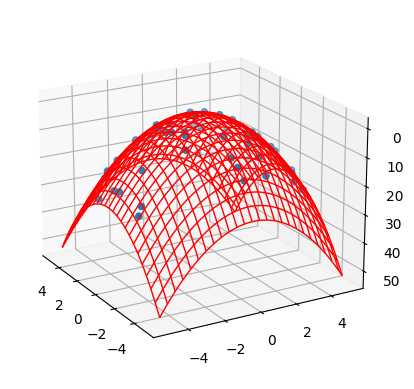

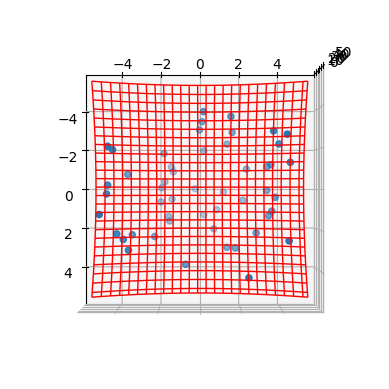

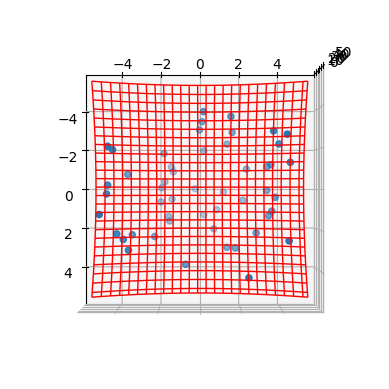

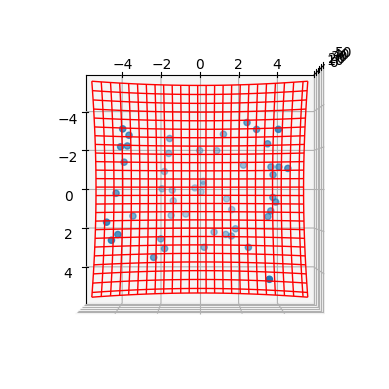

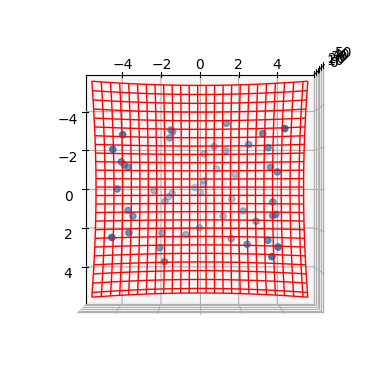

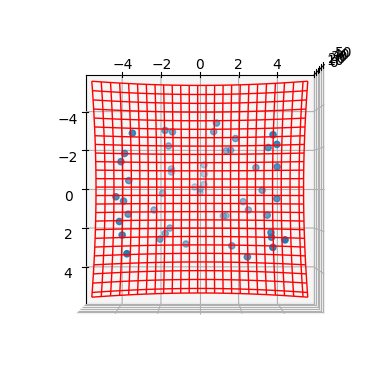

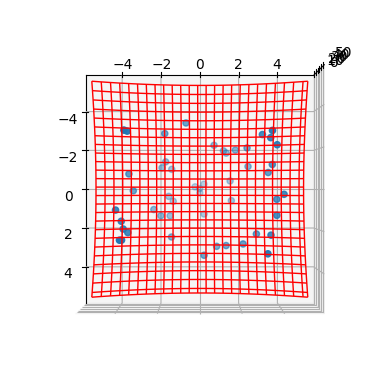

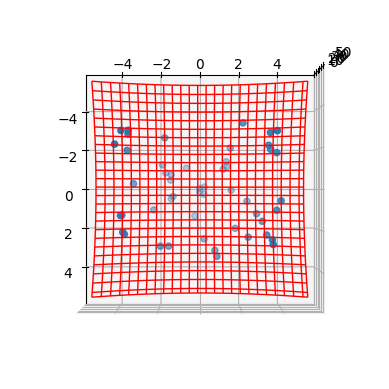

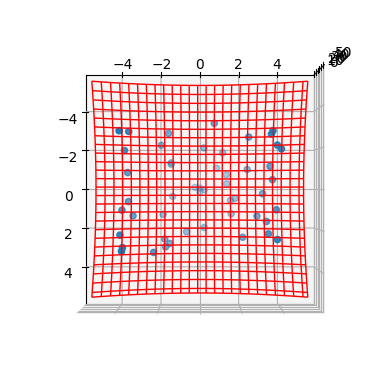

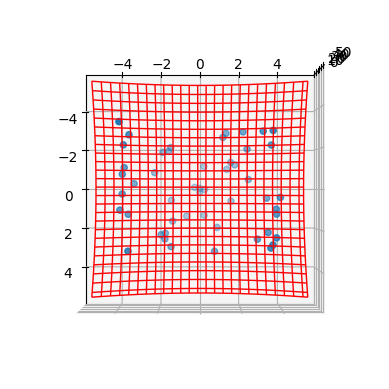

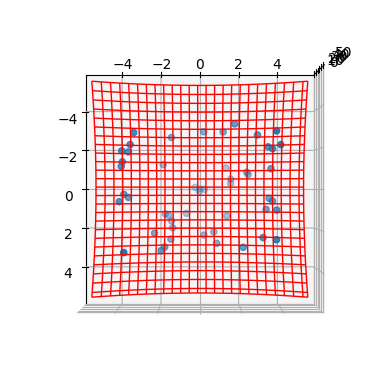

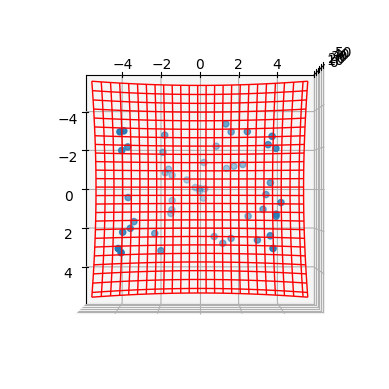

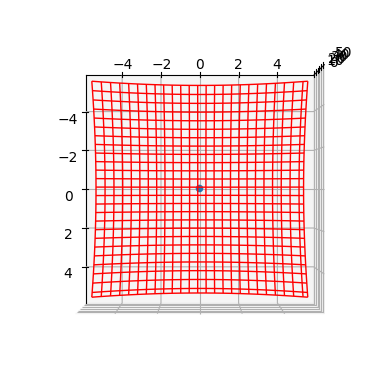

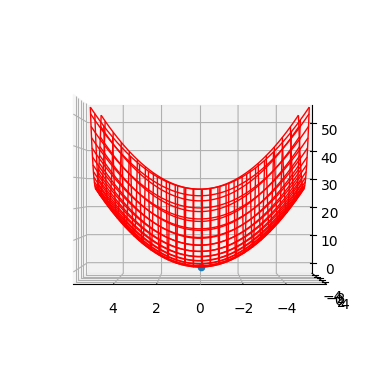

In [ ]:
population = initialize_population(population_size, central_point, radius)
plotGraph(population, function, -160, 30)
plotGraph(population, function, 90, 0)
best_fitness_values = []

for generation in range(generations):
    if generation % 10 == 0:
      plotGraph(population, function, 90, 0)


    fitness_values, _ = evaluate_population(population, function)
    best_fitness_values.append(min(fitness_values))

    population = elitist_selection(population, fitness_values, elite_percent)

    mutated_population = []
    for chromosome in population:
        mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
        mutated_population.append(mutated_chromosome)
    population = mutated_population

    new_population = []
    for i in range(0, len(population), 2):
        if i + 1 < len(population):
            child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
            new_population.extend([child1, child2])
    population = new_population

best_solution = min(population, key=lambda x: function(x[0], x[1]))
plotGraph([best_solution], function, 90, 0)
plotGraph([best_solution], function, 0, 90)

In [ ]:
print("Best solution:", best_solution)
print("Best fitness value:", function(best_solution[0], best_solution[1]))

Best solution: (-0.06541513079160644, -0.022073398949131545)
Best fitness value: 0.004766374277650498


### Rastrigin

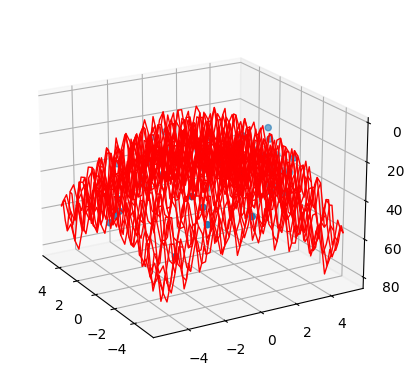

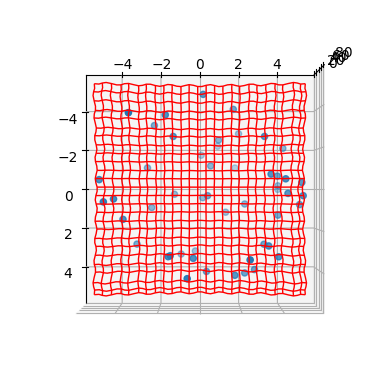

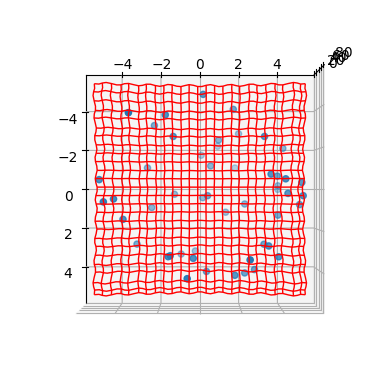

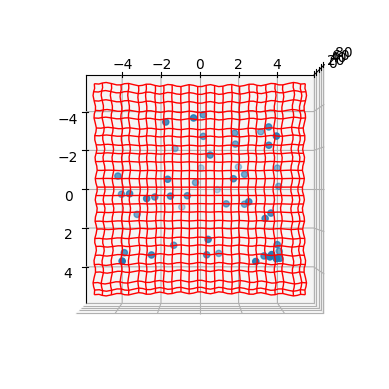

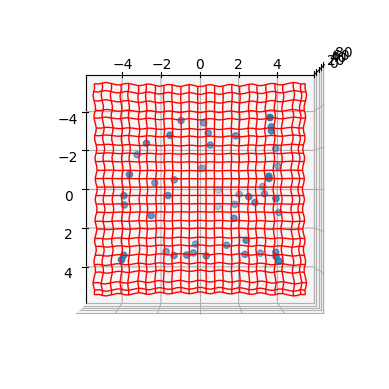

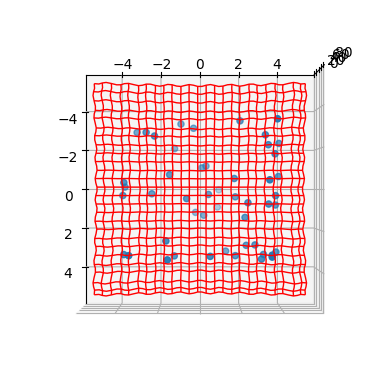

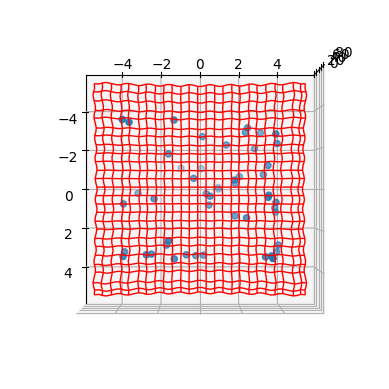

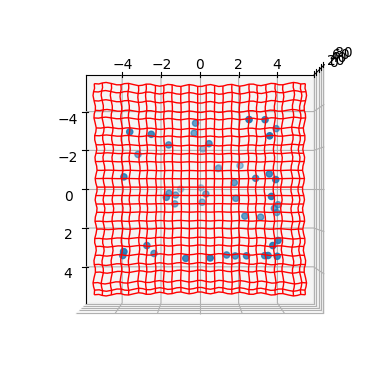

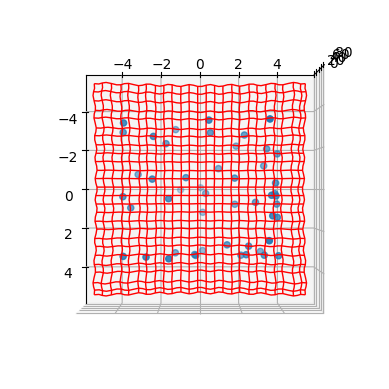

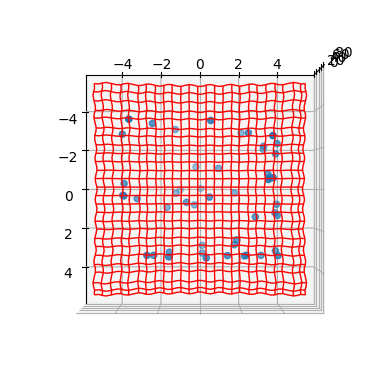

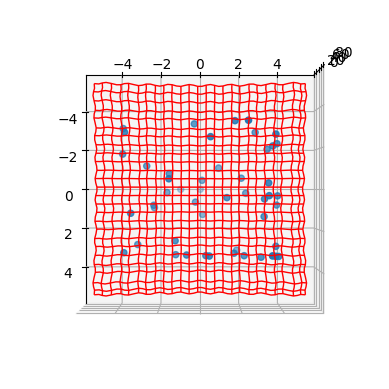

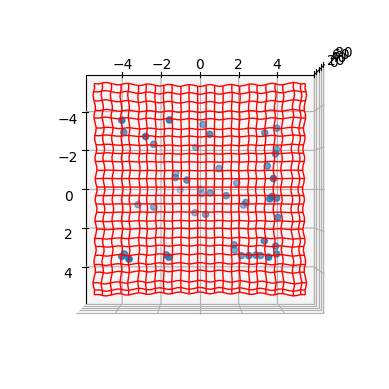

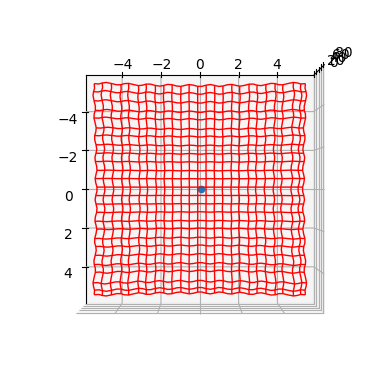

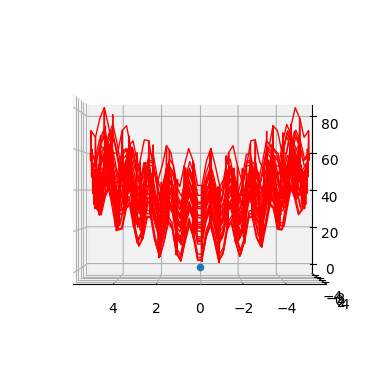

In [ ]:
function = rastrigin
population = initialize_population(population_size, central_point, radius)
plotGraph(population, function, -160, 30)
plotGraph(population, function, 90, 0)
best_fitness_values = []

for generation in range(generations):
    if generation % 10 == 0:
      plotGraph(population, function, 90, 0)


    fitness_values, _ = evaluate_population(population, function)
    best_fitness_values.append(min(fitness_values))

    population = elitist_selection(population, fitness_values, elite_percent)

    mutated_population = []
    for chromosome in population:
        mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
        mutated_population.append(mutated_chromosome)
    population = mutated_population

    new_population = []
    for i in range(0, len(population), 2):
        if i + 1 < len(population):
            child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
            new_population.extend([child1, child2])
    population = new_population

best_solution = min(population, key=lambda x: function(x[0], x[1]))
plotGraph([best_solution], function, 90, 0)
plotGraph([best_solution], function, 0, 90)

In [ ]:
print("Best solution:", best_solution)
print("Best fitness value:", function(best_solution[0], best_solution[1]))

Best solution: (-0.004746570686245791, 0.049999910959532115)
Best fitness value: 0.4964025302114532


### Ackley

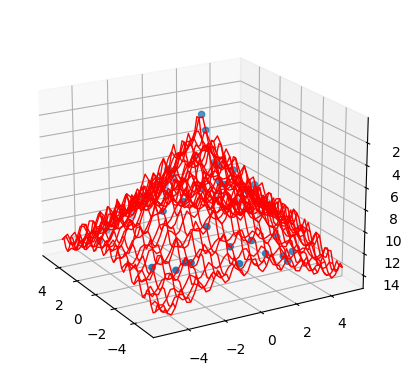

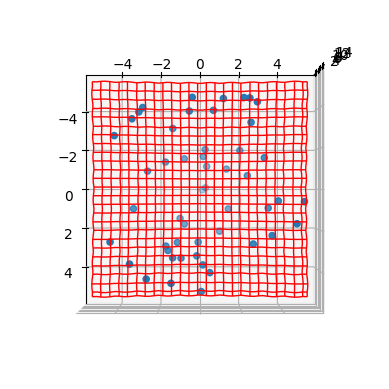

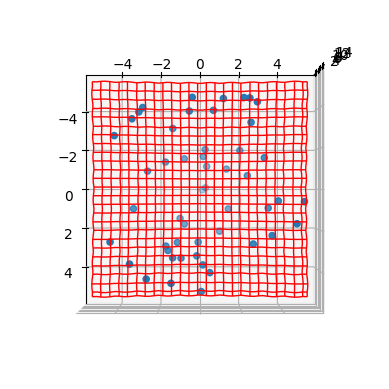

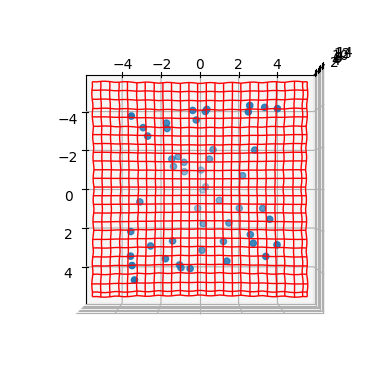

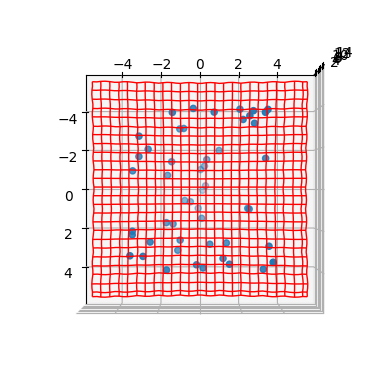

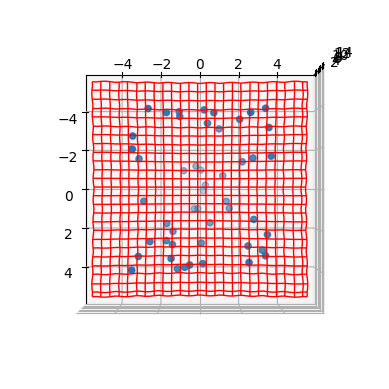

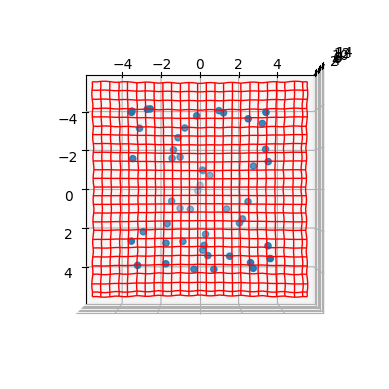

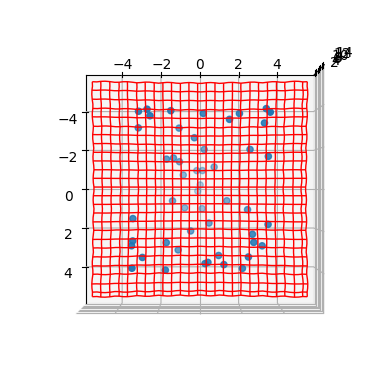

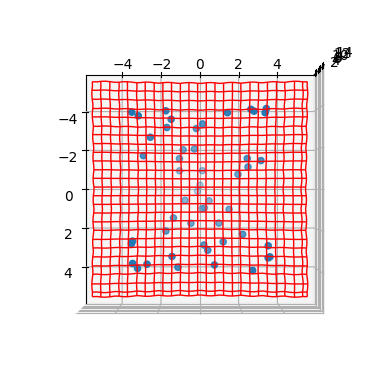

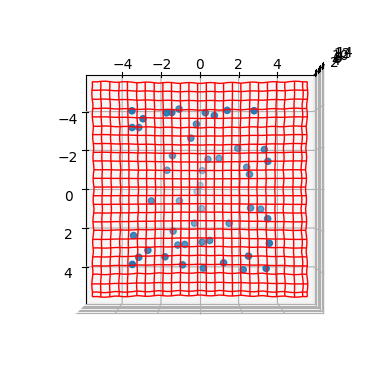

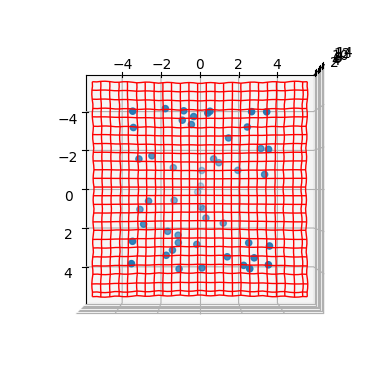

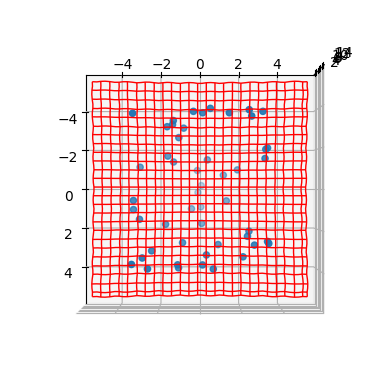

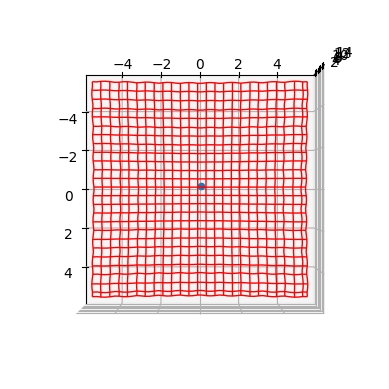

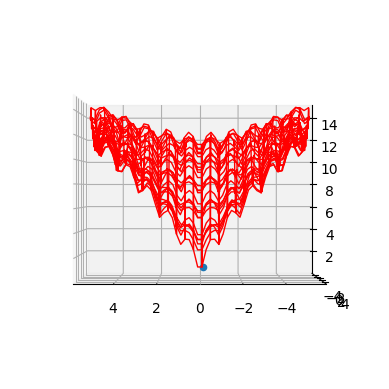

In [ ]:
function = ackley
population = initialize_population(population_size, central_point, radius)
plotGraph(population, function, -160, 30)
plotGraph(population, function, 90, 0)
best_fitness_values = []

for generation in range(generations):
    if generation % 10 == 0:
      plotGraph(population, function, 90, 0)


    fitness_values, _ = evaluate_population(population, function)
    best_fitness_values.append(min(fitness_values))

    population = elitist_selection(population, fitness_values, elite_percent)

    mutated_population = []
    for chromosome in population:
        mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
        mutated_population.append(mutated_chromosome)
    population = mutated_population

    new_population = []
    for i in range(0, len(population), 2):
        if i + 1 < len(population):
            child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
            new_population.extend([child1, child2])
    population = new_population

best_solution = min(population, key=lambda x: function(x[0], x[1]))
plotGraph([best_solution], function, 90, 0)
plotGraph([best_solution], function, 0, 90)

In [ ]:
print("Best solution:", best_solution)
print("Best fitness value:", function(best_solution[0], best_solution[1]))

Best solution: (-0.14107943017499014, 0.057843165403600454)
Best fitness value: 0.9559642013247505


### Variando população:

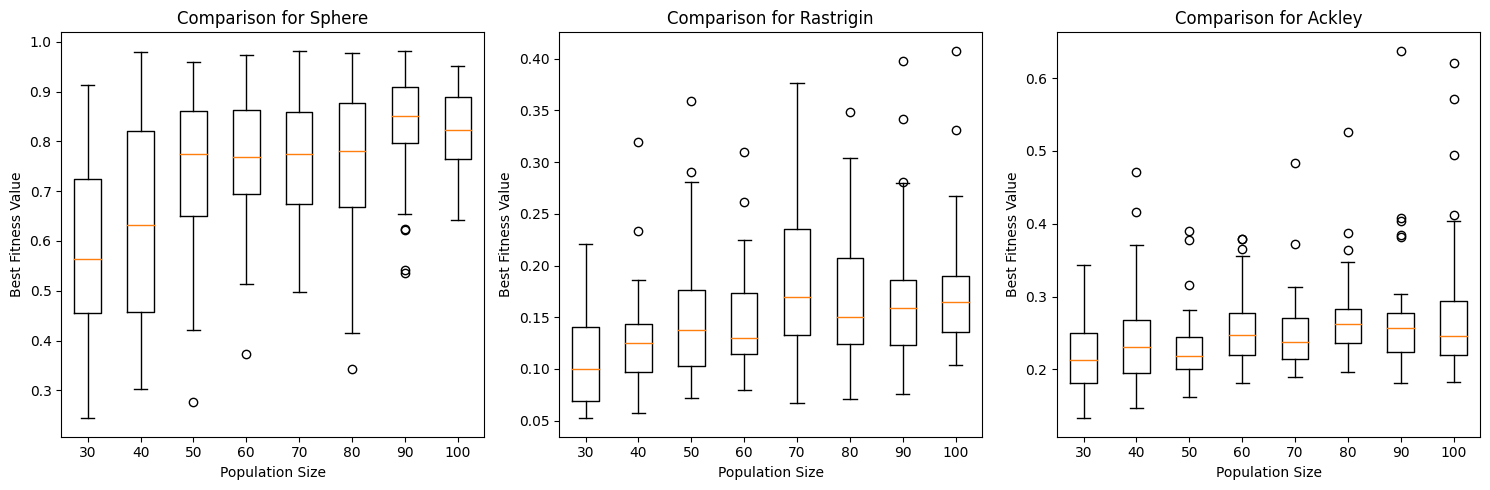

In [ ]:
best_fitness_by_population_size = []

labels = []

population_sizes = list(range(30, 101, 10))

functions = [sphere, rastrigin, ackley]
function_names = ['Sphere', 'Rastrigin', 'Ackley']

fig, axes = plt.subplots(nrows=1, ncols=len(functions), figsize=(15, 5))

for idx, function in enumerate(functions):
    best_fitness_values_for_function = []
    for population_size in population_sizes:
        best_fitness_values_iter = []
        for _ in range(30):
            population = initialize_population(population_size, central_point, radius)
            best_fitness_values = []

            for generation in range(generations):
                fitness_values, _ = evaluate_population(population, function)
                best_fitness_values.append(max(fitness_values))

                population = elitist_selection(population, fitness_values, elite_percent)

                mutated_population = []
                for chromosome in population:
                    mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
                    mutated_population.append(mutated_chromosome)
                population = mutated_population

                new_population = []
                for i in range(0, len(population), 2):
                    if i + 1 < len(population):
                        child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
                        new_population.extend([child1, child2])
                population = new_population

            best_fitness_values_iter.append(min(best_fitness_values))

        best_fitness_values_for_function.append(best_fitness_values_iter)

        labels.append(f"{function_names[idx]} - {population_size}")

    axes[idx].boxplot(best_fitness_values_for_function, labels=population_sizes)
    axes[idx].set_xlabel("Population Size")
    axes[idx].set_ylabel("Best Fitness Value")
    axes[idx].set_title(f"Comparison for {function_names[idx]}")

plt.tight_layout()
plt.show()

Na função da esfera, a variação do tamanho da população impactou significativamente a média dos melhores valores de fitness provavelmente pela topologia da figura, além disso podemos verificar uma grande discrepância entre os limites superiores e inferiores, apesar de existir poucos outliers.

Nas funções Rastrigin e Ackley houve pouca variação nas médias de fitness por outro lado os dados se mantiveram mais próximos da média, além disso houveram mais outliers, acredito que seja pela forma de inicialização dos cromossomos.

### Variando taxa de cruzamento

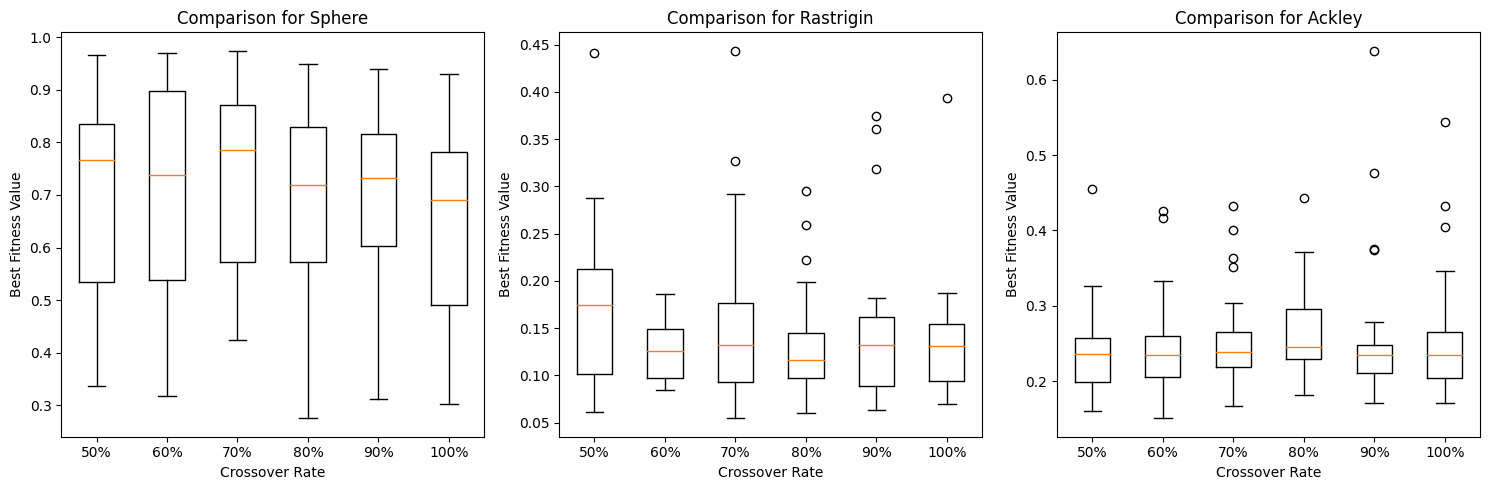

In [ ]:
best_fitness_by_crossover_rate = []

crossover_rates = [i / 100 for i in range(50, 101, 10)]

# function = sphere
functions = [sphere, rastrigin, ackley]
function_names = ['Sphere', 'Rastrigin', 'Ackley']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, function in enumerate(functions):
    best_fitness_values_for_function = []
    for crossover_rate in crossover_rates:
        best_fitness_values_for_crossover_rate = []
        for _ in range(30):
            population = initialize_population(50, central_point, radius)
            best_fitness_values = []
            for generation in range(generations):
                fitness_values, _ = evaluate_population(population, function)
                best_fitness_values.append(max(fitness_values))
                population = elitist_selection(population, fitness_values, elite_percent)
                mutated_population = []
                for chromosome in population:
                    mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
                    mutated_population.append(mutated_chromosome)
                population = mutated_population
                new_population = []
                for i in range(0, len(population), 2):
                    if i + 1 < len(population) or random.random() < crossover_rate:
                        child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
                        new_population.extend([child1, child2])
                population = new_population
            best_fitness_values_for_crossover_rate.append(min(best_fitness_values))
        best_fitness_values_for_function.append(best_fitness_values_for_crossover_rate)

    axs[idx].boxplot(best_fitness_values_for_function, labels=[str(int(rate * 100)) + '%' for rate in crossover_rates])
    axs[idx].set_xlabel("Crossover Rate")
    axs[idx].set_ylabel("Best Fitness Value")
    axs[idx].set_title(f"Comparison for {function_names[idx]}")

plt.tight_layout()
plt.show()


A variação das taxas de crossover segue o mesmo padrão, exceto na função da esfera.

Na função da esfera, a taxa de crossover impactou pouco a média dos melhores valores de fitness, contudo ainda há uma grande diferença entre os limites inferiores e superiores e não houveram outliers.

Nas funções Rastrigin e Ackley houve pouca variação nas médias de fitness e os dados se mantiveram próximos da média, mantendo mais outliers.

### Variando modo de crossover:

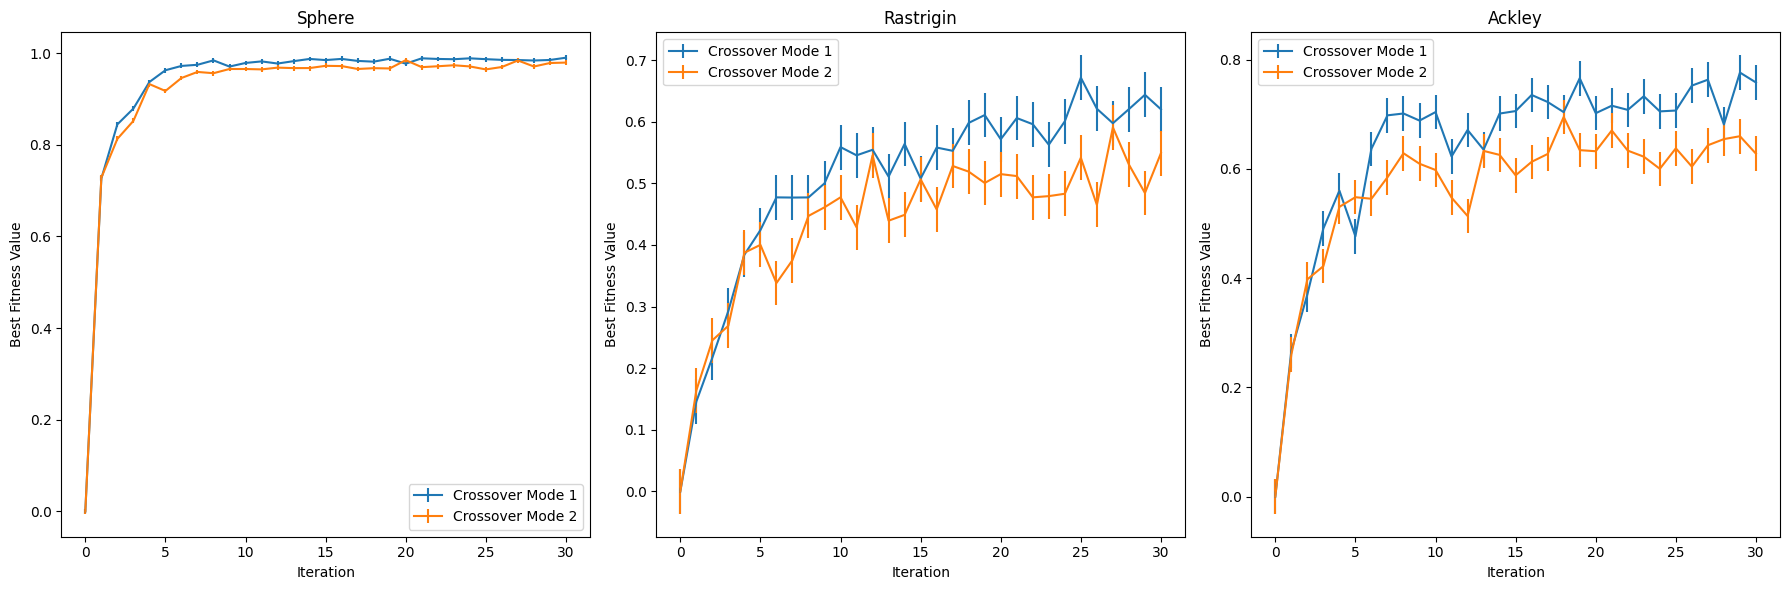

In [ ]:

functions = [sphere, rastrigin, ackley]
function_names = ['Sphere', 'Rastrigin', 'Ackley']

iterations = 31
population_size = 50
crossover_probability = 0.85
mutation_probability = 0.01
elite_percent = 0.1
num_runs = 30
modes = ['1', '2']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for func_idx, function in enumerate(functions):
    mode_results = []

    for mode_idx, mode in enumerate(modes):
        best_fitness_values = np.zeros(iterations)

        for iteration in range(iterations):
            run_fitness_values = np.zeros(num_runs)

            for run in range(num_runs):
                population = initialize_population(population_size, central_point, radius)
                best_fitness_by_generation = []

                for generation in range(iteration):
                    fitness_values, _ = evaluate_population(population, function)

                    best_fitness_by_generation.append(max(fitness_values))

                    population = elitist_selection(population, fitness_values, elite_percent)

                    mutated_population = []
                    for chromosome in population:
                        mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
                        mutated_population.append(mutated_chromosome)
                    population = mutated_population

                    new_population = []
                    for i in range(0, len(population), 2):
                        if i + 1 < len(population):
                            child1, child2 = swap_crossover(population[i], population[i + 1], mode=mode)
                            new_population.extend([child1, child2])
                    population = new_population

                if best_fitness_by_generation:
                    run_fitness_values[run] = max(best_fitness_by_generation)

            if run_fitness_values.any():
                avg_fitness = np.mean(run_fitness_values)
                best_fitness_values[iteration] = avg_fitness
                std_error = np.std(run_fitness_values) / np.sqrt(num_runs)

        mode_results.append(best_fitness_values)

    for mode_idx, mode in enumerate(modes):
        axs[func_idx].errorbar(range(iterations), mode_results[mode_idx], yerr=std_error, label=f"Crossover Mode {mode}")

    axs[func_idx].set_xlabel("Iteration")
    axs[func_idx].set_ylabel("Best Fitness Value")
    axs[func_idx].set_title(f"{function_names[func_idx]}")
    axs[func_idx].legend()

plt.tight_layout()
plt.show()

Apesar do nome, o modo de crossover 1 faz alterações em dois pontos do cromossomo, verificamos um melhor desempenho desse modo nas três funções, provavelmente por fazer o cromossomo filho viajar mais aleatóriamente na superficie da figura.

Já o modo 2 pode fazer dois cromossomos filhos terem os mesmos fitness dos pais, por exemplo, os pontos (-1, 0) e (1, 0) estão diametralmente equidistantes do centro da esfera, a troca dos ys desses cromossomos resultam em filhos identicos, outro exemplo seria (0, 1) e (0, -1).

### Variando seleção:

In [ ]:
def roulette_selection(population, fitness_values):
    selected_population = []
    total_fitness = sum(fitness_values)

    selection_probabilities = [fitness / total_fitness for fitness in fitness_values]

    for _ in range(len(population)):
        rand_num = random.uniform(0, 1)
        cumulative_prob = 0

        for i, prob in enumerate(selection_probabilities):
            cumulative_prob += prob
            if rand_num <= cumulative_prob:
                selected_population.append(population[i])
                break

    return selected_population

def random_selection(population):
    return random.choice(population)

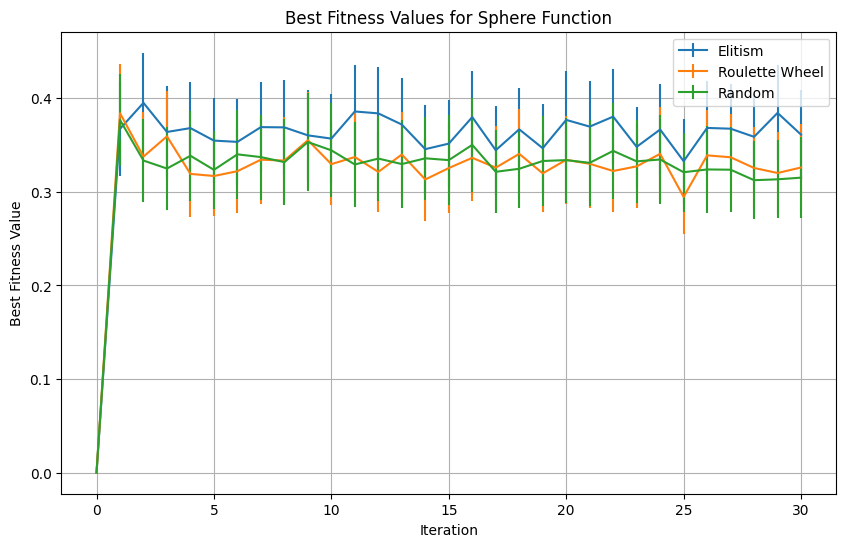

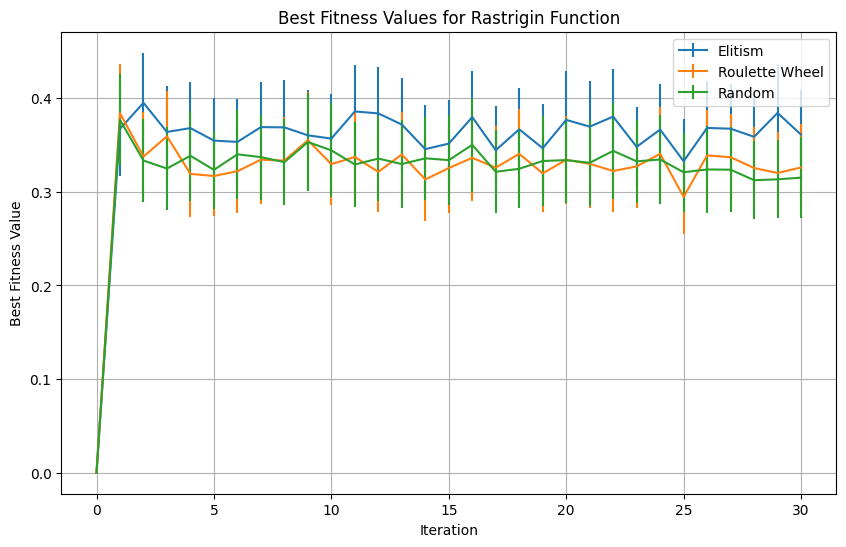

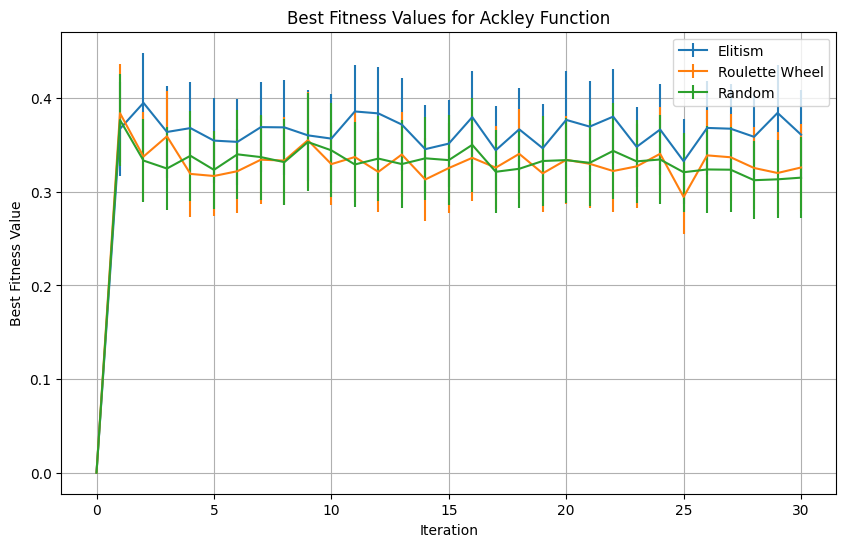

In [ ]:
iterations = 31  # From 0 to 30
population_size = 50
crossover_probability = 0.85
mutation_probability = 0.01
elite_percent = 0.1
num_runs = 30

selection_methods = ['Elitism', 'Roulette Wheel', 'Random']
functions = [sphere, rastrigin, ackley]
function_names = ['Sphere', 'Rastrigin', 'Ackley']

best_fitness_values = {method: np.zeros((iterations, num_runs, len(functions))) for method in selection_methods}

for method in selection_methods:
    for idx, function in enumerate(functions):
        for iteration in range(iterations):
            for run in range(num_runs):
                population = initialize_population(population_size, central_point, radius)

                best_fitness_by_generation = []

                for generation in range(iteration):
                    fitness_values, _ = evaluate_population(population, function)

                    best_fitness_by_generation.append(max(fitness_values)) #here

                    if method == 'Elitism':
                        population = elitist_selection(population, fitness_values, elite_percent)
                    elif method == 'Roulette Wheel':
                        selected_population = roulette_selection(population, fitness_values)
                    elif method == 'Random':
                        selected_population = [random_selection(population) for _ in range(len(population))]

                    mutated_population = []
                    for chromosome in population:
                        mutated_chromosome = mutate(chromosome, central_point, radius, mutation_probability)
                        mutated_population.append(mutated_chromosome)
                    population = mutated_population

                    new_population = []
                    for i in range(0, len(population), 2):
                        if i + 1 < len(population):
                            child1, child2 = swap_crossover(population[i], population[i + 1], mode=0)
                            new_population.extend([child1, child2])
                    population = new_population

                if best_fitness_by_generation:
                    best_fitness_values[method][iteration][run][idx] = min(best_fitness_by_generation)

avg_fitness_values = {method: np.mean(best_fitness_values[method], axis=(1, 2)) for method in selection_methods}
std_error_values = {method: np.std(best_fitness_values[method], axis=(1, 2)) / np.sqrt(num_runs) for method in selection_methods}

for idx, function_name in enumerate(function_names):
    plt.figure(figsize=(10, 6))
    for method in selection_methods:
        plt.errorbar(range(iterations), avg_fitness_values[method][:], yerr=std_error_values[method][:], label=method)

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness Value")
    plt.legend()
    plt.title(f"Best Fitness Values for {function_name} Function")
    plt.grid(True)
    plt.show()


Nas 3 funções verifica-se o melhor desempenho da seleção elitista, que sempre garante a escolha dos melhores fitness. Já o método de roleta e aleatório alternam-se em desempenho pois a seleção por roleta não garante que os melhores fitness sejam selecionados, além disso o método aleatório pode, por acaso selecionar os melhores fitness.